In [53]:
from spacerocks.spice import SpiceKernel
from spacerocks.spacerock import SpaceRock
from spacerocks.time import Time

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [54]:
kernel = SpiceKernel()
kernel.load("/Users/kjnapier/data/spice/latest_leapseconds.tls")
kernel.load("/Users/kjnapier/data/spice/de440s.bsp")

In [55]:
t0 = Time.now()

In [56]:
planets_names = ["sun", 
                 "mercury barycenter", 
                 "venus barycenter", 
                 "earth", 
                 "mars barycenter", 
                 "jupiter barycenter", 
                 "saturn barycenter", 
                 "uranus barycenter", 
                 "neptune barycenter"]

In [57]:
planets = {name: SpaceRock.from_spice(name, t0) for name in planets_names}
planet_positions = {planet: [] for planet in planets}

In [58]:
kernel.unload()

In [59]:
epochs = np.linspace(t0.epoch, t0.epoch + 365.25 * 300, 10_000, endpoint=True)
for epoch in epochs:

    t = Time(epoch, timescale='utc', format='jd')

    for name, planet in planets.items():
        planet.analytic_propagate(t)
        x, y, z = planet.position
        planet_positions[name].append([x, y, z])

Text(0, 0.5, 'y (au)')

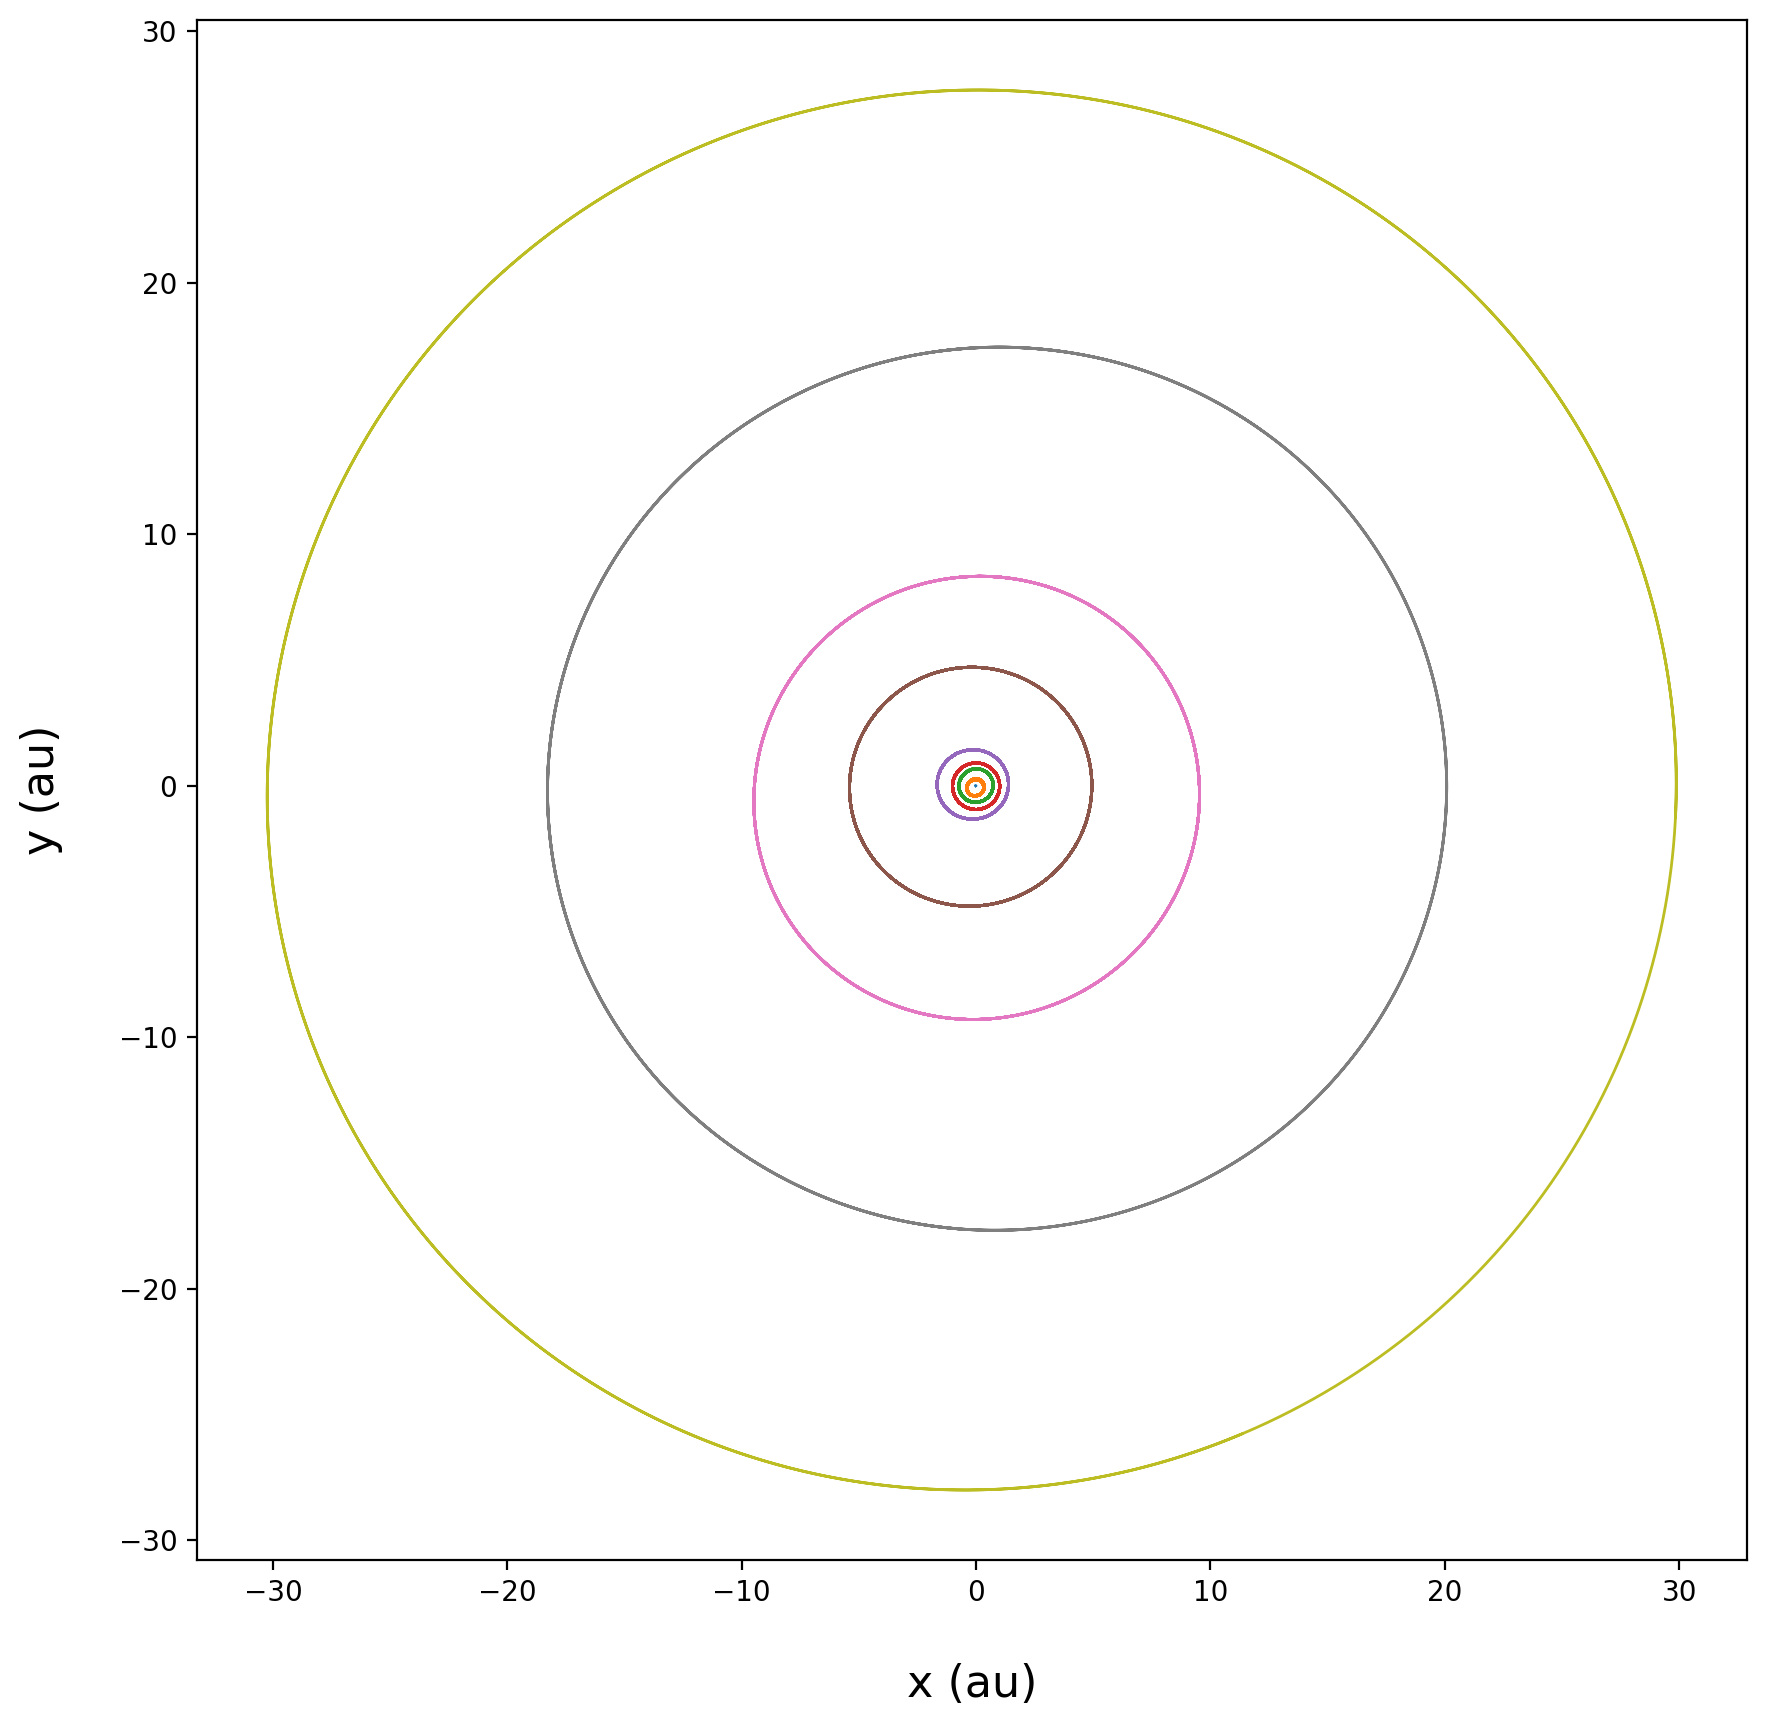

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for name, positions in planet_positions.items():
    x, y, z = np.array(positions).T
    ax.plot(x, y, label=name, lw=1)

ax.set_xlabel("x (au)", fontsize=16, labelpad=20)
ax.set_ylabel("y (au)", fontsize=16, labelpad=20)